Pentru a a imbunatati recunoasterea textului din imagini putem utiliza mai multe metode de manipulare a imaginilor 


1.Modificarea constrastului imaginilor in cazul in care facem o poza in lumina slaba sau in poza apar umbre, pete etc 

In [3]:
import cv2
import matplotlib.pyplot as plt


def contrast(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    enhanced_img = cv2.equalizeHist(img)

    out_path = 'enhanced_image.png'
    cv2.imwrite(out_path, enhanced_img)
    return out_path


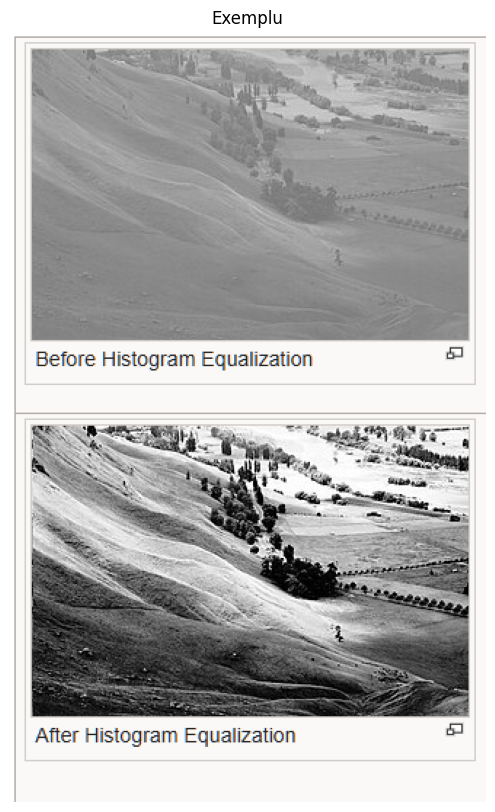

In [13]:
img_path1 = "images/Screenshot 2025-03-18 202924.png"

img1 = cv2.imread(img_path1, cv2.IMREAD_COLOR_BGR)

plt.figure(figsize=(10, 10))
plt.imshow(img1)
plt.axis('off')
plt.title("Exemplu")
plt.show()

2.Folosirea unui filtru median sau Gaussian pentru a inlatura 'zgomotul' imaginii sau imperfectiuniile ei pentru a fi mai usor de recunoscut doar textul

In [ ]:
def inlaturare_zgomot(image_path):
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    denoised_img = cv2.medianBlur(img, 3)

    out_path = 'denoised_image.png'
    cv2.imwrite(out_path, denoised_img)
    return out_path


3.IN cazul imaginilor prea mici sau de o dimensiune ne dorita iamginea poate fi marita pentru a obtine mai multe detalii, si putem folosi interpolarea pentru a scala imaginea

In [ ]:
import cv2

def resize_image(image_path, width=None, height=None):
    
    image = cv2.imread(image_path)
    h, w = image.shape[:2]

    if width is not None:
        ratio = width / float(w)
        dim = (width, int(h * ratio))
    elif height is not None:
        ratio = height / float(h)
        dim = (int(w * ratio), height)
    else:
        dim = (w, h)

    resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)

    out_path = 'resized_image.png'
    cv2.imwrite(out_path, resized_image)
    return out_path


Sau putem folosi Pillow pentru a pastra raportul de aspect

In [ ]:
from PIL import Image

def resize_pillow(image_path, width=None, height=None):
    
    image = Image.open(image_path)

    if width is not None:
        aspect_ratio = width / float(image.width)
        new_height = int(image.height * aspect_ratio)
        image = image.resize((width, new_height), Image.ANTIALIAS)

    elif height is not None:
        aspect_ratio = height / float(image.height)
        new_width = int(image.width * aspect_ratio)
        image = image.resize((new_width, height), Image.ANTIALIAS)

    out_path = 'resized_pillow_image.png'
    image.save(out_path)
    return out_path


4.In cazul in care textul e inclinat Se poate roti poza pentru a o alinia corect

In [ ]:
import cv2
import numpy as np

def text_orientation(image_path):
    
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

   
    edges = cv2.Canny(gray, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

    
    if lines is not None:
        angle = np.mean([np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi for x1, y1, x2, y2 in lines[:, 0]])
        h, w = img.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1)
        img = cv2.warpAffine(img, rotation_matrix, (w, h))

    out_path = 'rotated_image.png'
    cv2.imwrite(out_path, img)
    return out_path
